# Scraping data using spotipy 

In [ ]:
pip install spotipy

In [1]:
import spotipy
import time
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

# Set up your Spotify API credentials
client_id = 'cf20a10bace943d8ad8ea20e84b833a7'
client_secret = '071dba6077e14ceebdcf79b86eeff466'

# Initialize Spotipy with your credentials
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# List of playlist IDs (you can find these in the Spotify playlist URLs)
playlist_ids = ['4PZLNJuqhM2Ab3YK0y3RfI', '4KeGKpEuJv9wV4ehUDIsek', '0yOCqgciOhCKbXjqTRVgrF','3N8GLinlhEFYVsLcm3uNje','3KAZhG2sOtWhUxkXg222jQ','6tfXVOHGm6EDgHT84OYE5Y','37i9dQZF1EIUGRgRN2wdDR']

# Initialize an empty list to store track information
track_info_list = []

# Loop through each playlist
for playlist_id in playlist_ids:
    offset = 0

    while True:
        # Get the playlist details
        playlist_details = sp.playlist(playlist_id)

        # Get the playlist name
        playlist_name = playlist_details['name']

        # Get the playlist tracks with an offset
        playlist_tracks = sp.playlist_tracks(playlist_id, offset=offset)

        if not playlist_tracks['items']:
            break  # Break the loop if there are no more items

        # Extract track information for each track in the playlist
        for track in playlist_tracks['items']:
            track_details = sp.track(track['track']['id'])

            album_details = sp.album(track_details['album']['id'])

            audio_features = sp.audio_features([track['track']['id']])[0]

            artist_details = sp.artist(track_details['artists'][0]['id'])

            track_info = {
                'Track Name': track_details['name'],
                'Artist(s)': ', '.join(artist['name'] for artist in track_details['artists']),
                'Album': track_details['album']['name'],
                'Release Date': track_details['album']['release_date'],
                'Track Popularity': track_details['popularity'],
                'Duration (ms)': track_details['duration_ms'],
                'Tempo (BPM)': audio_features['tempo'],
                'Danceability': audio_features['danceability'],
                'Energy': audio_features['energy'],
                'Key': audio_features['key'],
                'Loudness': audio_features['loudness'],
                'Speechiness': audio_features['speechiness'],
                'Acousticness': audio_features['acousticness'],
                'Instrumentalness': audio_features['instrumentalness'],
                'Liveness': audio_features['liveness'],
                'Valence': audio_features['valence'],
                'Time Signature': audio_features['time_signature'],
                'Genres': ', '.join(artist_details['genres']),
                'Artist Popularity': artist_details['popularity'],
                'Playlist_Name': playlist_name  # Add playlist name to track info
            }
            track_info_list.append(track_info)

        offset += len(playlist_tracks['items'])  # Increment the offset for the next batch

# Create DataFrame from track information
df = pd.DataFrame(track_info_list)

In [25]:
genre_mapping = dict(zip(oldf['Artist(s)'], oldf['Main Genre']))

# Add a new column 'Main Genre' to 'df' based on the mapping
df['Main Genre'] = df['Artist(s)'].map(genre_mapping)


In [26]:
# Assuming 'df' is your dataframe

# Create a condition for rows where 'Main Genre' is NaN and 'pop' is in the 'Genres' column
pop_condition = df['Genres'].str.contains('dance pop', case=False, na=False) & df['Main Genre'].isna()

# If the condition is met, set 'Pop' in the 'Main Genre' column
df.loc[pop_condition, 'Main Genre'] = 'Pop'


In [30]:
# Create a condition for rows where 'Main Genre' is NaN and 'pop' is in the 'Genres' column
rock_condition = df['Genres'].str.contains('classic rock', case=False, na=False) & df['Main Genre'].isna()

# If the condition is met, set 'Pop' in the 'Main Genre' column
df.loc[rock_condition, 'Main Genre'] = 'Rock'

In [32]:
# Create a condition for rows where 'Main Genre' is NaN and 'pop' is in the 'Genres' column
house_condition = df['Genres'].str.contains('house', case=False, na=False) & df['Main Genre'].isna()

# If the condition is met, set 'Pop' in the 'Main Genre' column
df.loc[house_condition, 'Main Genre'] = 'House'

In [33]:
# Create a condition for rows where 'Main Genre' is NaN and 'pop' is in the 'Genres' column
elec_condition = df['Genres'].str.contains('electronic', case=False, na=False) & df['Main Genre'].isna()

# If the condition is met, set 'Pop' in the 'Main Genre' column
df.loc[elec_condition, 'Main Genre'] = 'Electronic'

In [22]:
df.to_csv('proj.csv')

# EDA

In [41]:
import pandas as pd

df = pd.read_csv('proj.csv')
df = df.drop(['Genres', 'Unnamed: 0','Unnamed: 0.1'],axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Track Name         1028 non-null   object 
 1   Artist(s)          1028 non-null   object 
 2   Album              1028 non-null   object 
 3   Release Date       1028 non-null   object 
 4   Track Popularity   1028 non-null   int64  
 5   Duration (ms)      1028 non-null   int64  
 6   Tempo (BPM)        1028 non-null   float64
 7   Danceability       1028 non-null   float64
 8   Energy             1028 non-null   float64
 9   Key                1028 non-null   int64  
 10  Loudness           1028 non-null   float64
 11  Speechiness        1028 non-null   float64
 12  Acousticness       1028 non-null   float64
 13  Instrumentalness   1028 non-null   float64
 14  Liveness           1028 non-null   float64
 15  Valence            1028 non-null   float64
 16  Time Signature     1028 

In [43]:
df.head()

,Track Name,Artist(s),Album,Release Date,Track Popularity,Duration (ms),Tempo (BPM),Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Time Signature,Artist Popularity,Playlist_Name,Main Genre
0,Canopée,Polo & Pan,Caravelle,2017-05-19,67,276293,96.005,0.704,0.692,5,-6.558,0.0304,0.0942,0.0109,0.0922,0.369,4,60,Electropop,Electropop
1,Dorothy,Polo & Pan,Caravelle,2017-05-19,42,316906,118.001,0.801,0.454,8,-9.582,0.0572,0.0200,0.3390,0.0965,0.400,4,60,Electropop,Electropop
2,Rivolta,Polo & Pan,Dorothy,2014-09-21,50,311575,92.887,0.553,0.511,0,-10.079,0.0625,0.1120,0.9110,0.1190,0.465,4,60,Electropop,Electropop
3,Cœur d'artichaut,Polo & Pan,Dorothy,2014-09-21,47,210492,96.994,0.704,0.724,0,-8.202,0.0459,0.1620,0.0853,0.0816,0.507,4,60,Electropop,Electropop
4,Love Song (feat. Glasses),"Kazy Lambist, Glasses",33 000 FT.,2018-06-08,67,170868,114.010,0.761,0.436,9,-11.614,0.0424,0.4540,0.2640,0.1110,0.374,4,56,Electropop,Electropop


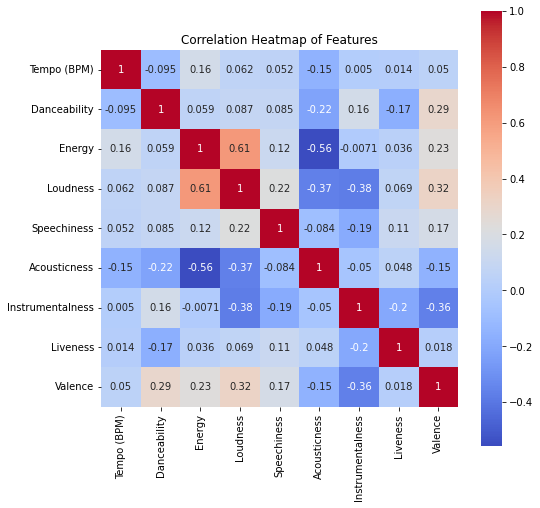

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# can you add a scatterplot with all the numerical features? 

# Select numerical columns
numeric_df = df.select_dtypes(include='float64')
corr = numeric_df.corr()

plt.figure(figsize=(8,8))

# Generate a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()

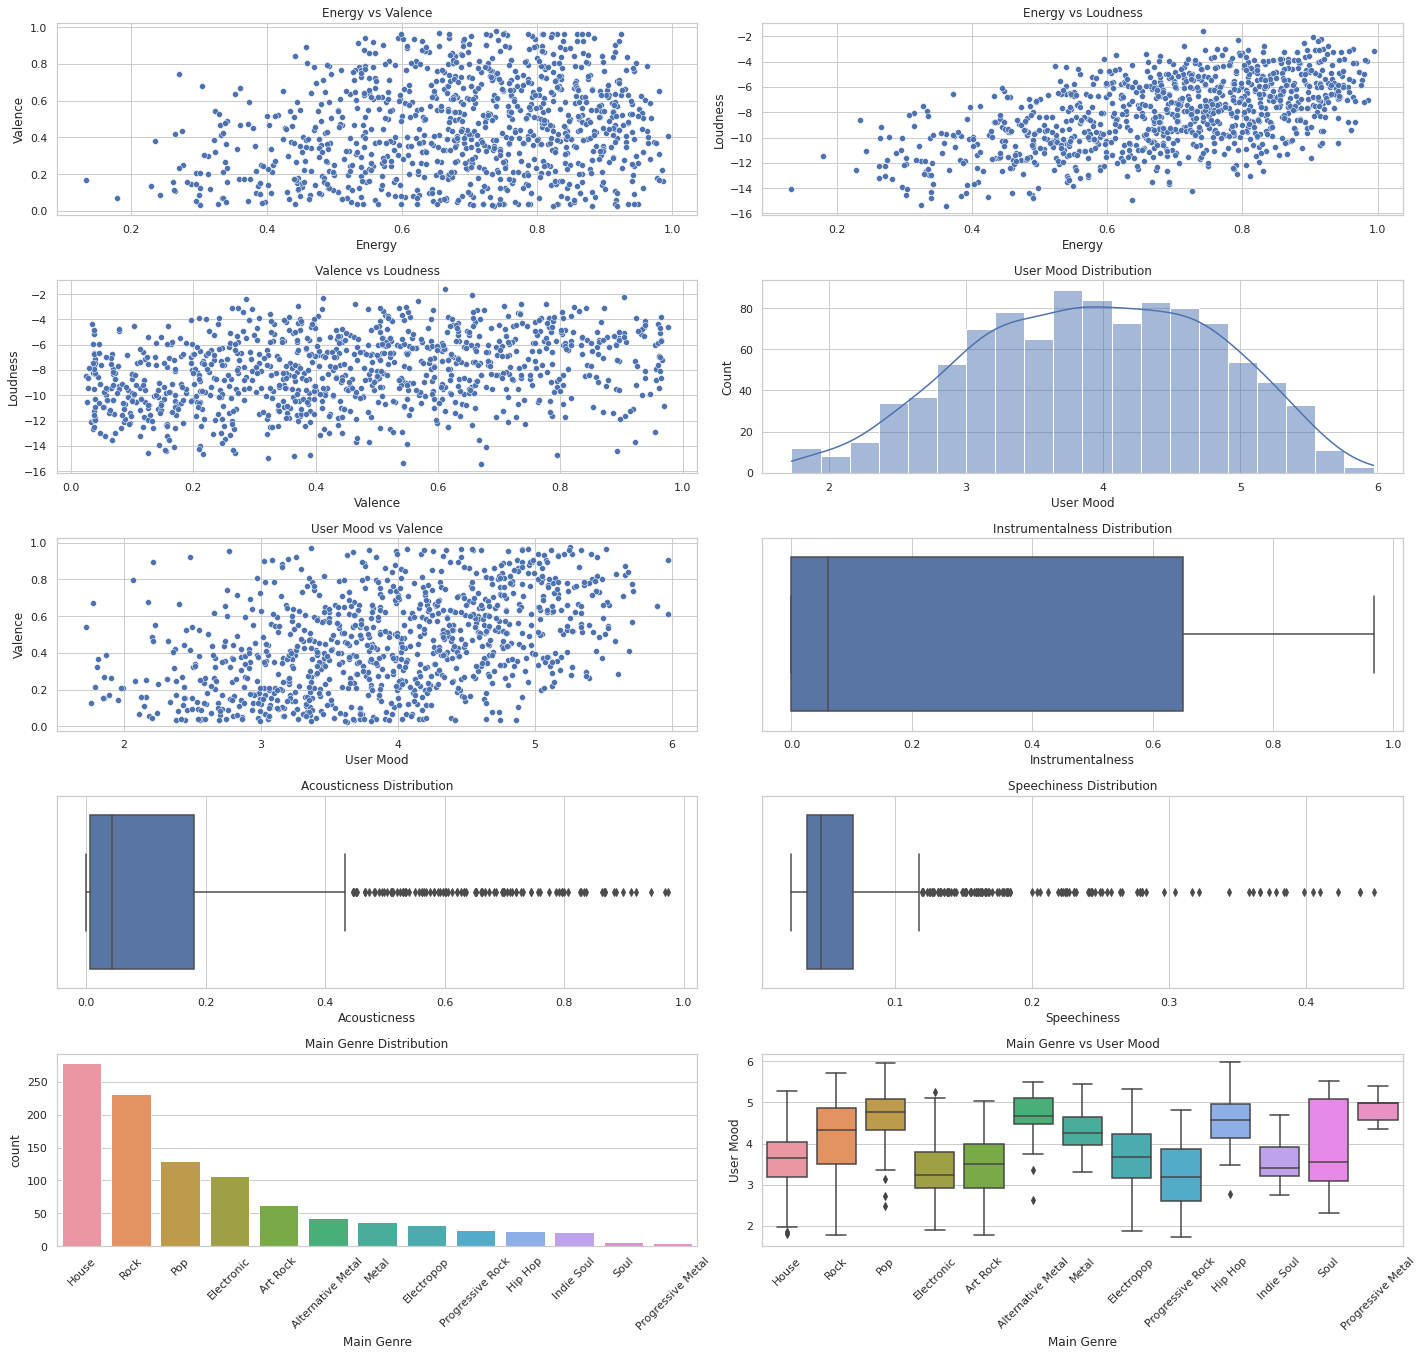

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create subplots for better organization
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 19))

# Energy, Valence, Loudness
sns.scatterplot(x='Energy', y='Valence', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Energy vs Valence')

sns.scatterplot(x='Energy', y='Loudness', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Energy vs Loudness')

sns.scatterplot(x='Valence', y='Loudness', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Valence vs Loudness')

# User Mood
sns.histplot(df['User Mood'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('User Mood Distribution')

# Cluster (Categorical)
sns.scatterplot(x='User Mood', y='Valence', data=df, ax=axes[2, 0])
axes[2, 0].set_title('User Mood vs Valence')

# Instrumentalness, Acousticness, Speechiness
sns.boxplot(x='Instrumentalness', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Instrumentalness Distribution')

sns.boxplot(x='Acousticness', data=df, ax=axes[3, 0])
axes[3, 0].set_title('Acousticness Distribution')

sns.boxplot(x='Speechiness', data=df, ax=axes[3, 1])
axes[3, 1].set_title('Speechiness Distribution')

genre_order = df['Main Genre'].value_counts().index
# Main Genre
sns.countplot(x='Main Genre', data=df, ax=axes[4, 0], order= genre_order)
axes[4, 0].set_title('Main Genre Distribution')
axes[4, 0].tick_params(axis='x', rotation=45)

# Create the boxplot with the specified order
sns.boxplot(x='Main Genre', y='User Mood', data=df, ax=axes[4, 1], order=genre_order)
axes[4, 1].set_title('Main Genre vs User Mood')
axes[4, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

# Hypothesis testing the features

In [24]:
from scipy.stats import pearsonr

# Significance level
alpha = 0.05

# Hypothesis testing for Valence and Energy
corr_valence_energy, p_valence_energy = pearsonr(df['Valence'], df['Energy'])
print(f"Correlation between Valence and Energy: {corr_valence_energy}")
print(f"P-value: {p_valence_energy}")
if p_valence_energy < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Valence and Energy.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Valence and Energy.")

# Hypothesis testing for Valence and Loudness
corr_valence_loudness, p_valence_loudness = pearsonr(df['Valence'], df['Loudness'])
print(f"\nCorrelation between Valence and Loudness: {corr_valence_loudness}")
print(f"P-value: {p_valence_loudness}")
if p_valence_loudness < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Valence and Loudness.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Valence and Loudness.")

# Hypothesis testing for Energy and Loudness
corr_energy_loudness, p_energy_loudness = pearsonr(df['Energy'], df['Loudness'])
print(f"\nCorrelation between Energy and Loudness: {corr_energy_loudness}")
print(f"P-value: {p_energy_loudness}")
if p_energy_loudness < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Energy and Loudness.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Energy and Loudness.")

Correlation between Valence and Energy: 0.20447040397078928
P-value: 6.862189174696948e-11
Reject the null hypothesis: There is a significant relationship between Valence and Energy.

Correlation between Valence and Loudness: 0.30394494201101563
P-value: 8.513090695215058e-23
Reject the null hypothesis: There is a significant relationship between Valence and Loudness.

Correlation between Energy and Loudness: 0.5427315522864699
P-value: 1.3334285846359042e-77
Reject the null hypothesis: There is a significant relationship between Energy and Loudness.


In [25]:
from scipy.stats import pearsonr

# Significance level
alpha = 0.05

# Hypothesis testing for User Mood and Valence
corr_user_mood_valence, p_user_mood_valence = pearsonr(df['User Mood'], df['Valence'])
print(f"Correlation between User Mood and Valence: {corr_user_mood_valence}")
print(f"P-value: {p_user_mood_valence}")
if p_user_mood_valence < alpha:
    print("Reject the null hypothesis: There is a significant relationship between User Mood and Valence.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between User Mood and Valence.")

# Hypothesis testing for User Mood and Energy
corr_user_mood_energy, p_user_mood_energy = pearsonr(df['User Mood'], df['Energy'])
print(f"\nCorrelation between User Mood and Energy: {corr_user_mood_energy}")
print(f"P-value: {p_user_mood_energy}")
if p_user_mood_energy < alpha:
    print("Reject the null hypothesis: There is a significant relationship between User Mood and Energy.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between User Mood and Energy.")

# Hypothesis testing for User Mood and Loudness
corr_user_mood_loudness, p_user_mood_loudness = pearsonr(df['User Mood'], df['Loudness'])
print(f"\nCorrelation between User Mood and Loudness: {corr_user_mood_loudness}")
print(f"P-value: {p_user_mood_loudness}")
if p_user_mood_loudness < alpha:
    print("Reject the null hypothesis: There is a significant relationship between User Mood and Loudness.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between User Mood and Loudness.")

Correlation between User Mood and Valence: 0.4302221681041166
P-value: 2.849446985846837e-46
Reject the null hypothesis: There is a significant relationship between User Mood and Valence.

Correlation between User Mood and Energy: 0.5623268109826851
P-value: 2.291350703833934e-84
Reject the null hypothesis: There is a significant relationship between User Mood and Energy.

Correlation between User Mood and Loudness: 0.9793275699712601
P-value: 0.0
Reject the null hypothesis: There is a significant relationship between User Mood and Loudness.


In [26]:
import statsmodels.api as sm

# Add a constant term to the independent variable
X_valence = sm.add_constant(df['Valence'])
X_user_mood = sm.add_constant(df['User Mood'])

# Fit the OLS regression models
model_valence = sm.OLS(df['Energy'], X_valence).fit()
model_user_mood = sm.OLS(df['Energy'], X_user_mood).fit()

# Print summaries of the regression results
print("Regression Analysis for Valence:")
print(model_valence.summary())

print("\nRegression Analysis for User Mood:")
print(model_user_mood.summary())

# Extract p-values for 'Valence' and 'User Mood'
p_value_valence = model_valence.pvalues['Valence']
p_value_user_mood = model_user_mood.pvalues['User Mood']

# Hypothesis testing for Valence
alpha = 0.05
if p_value_valence < alpha:
    print("\nReject the null hypothesis: 'Valence' is a significant predictor of 'Energy'.")
else:
    print("\nFail to reject the null hypothesis: 'Valence' is not a significant predictor of 'Energy'.")

# Hypothesis testing for User Mood
if p_value_user_mood < alpha:
    print("\nReject the null hypothesis: 'User Mood' is a significant predictor of 'Energy'.")
else:
    print("\nFail to reject the null hypothesis: 'User Mood' is not a significant predictor of 'Energy'.")

Regression Analysis for Valence:
                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     43.50
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           6.86e-11
Time:                        08:55:04   Log-Likelihood:                 362.68
No. Observations:                 999   AIC:                            -721.4
Df Residuals:                     997   BIC:                            -711.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.62

In [27]:
from scipy.stats import shapiro, normaltest, anderson

stat_shapiro, p_shapiro = shapiro(df['User Mood'])
stat_normaltest, p_normaltest = normaltest(df['User Mood'])
result_anderson = anderson(df['User Mood'], dist='norm')

# Print test results
print(f"Shapiro-Wilk Test Statistic: {stat_shapiro}, P-value: {p_shapiro}")
print(f"Normal Test Statistic: {stat_normaltest}, P-value: {p_normaltest}")
print(f"Anderson-Darling Test Statistic: {result_anderson.statistic}")
print(f"Critical Values: {result_anderson.critical_values}")

# Interpretation
alpha = 0.05
if p_shapiro < alpha or p_normaltest < alpha or result_anderson.statistic > result_anderson.critical_values[2]:
    print("\nReject the hypothesis that 'User Mood' does not follow a normal distribution.")
else:
    print("\nFail to reject the hypothesis that 'User Mood' follows a normal distribution.")

Shapiro-Wilk Test Statistic: 0.9710434675216675, P-value: 3.213891826281401e-13
Normal Test Statistic: 30.100456048506523, P-value: 2.909169446016337e-07
Anderson-Darling Test Statistic: 10.074072503919865
Critical Values: [0.574 0.653 0.784 0.914 1.088]

Reject the hypothesis that 'User Mood' does not follow a normal distribution.


# Implementation of K-Means(Unsupervised ML)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Track Name         1028 non-null   object 
 1   Artist(s)          1028 non-null   object 
 2   Album              1028 non-null   object 
 3   Release Date       1028 non-null   object 
 4   Track Popularity   1028 non-null   int64  
 5   Duration (ms)      1028 non-null   int64  
 6   Tempo (BPM)        1028 non-null   float64
 7   Danceability       1028 non-null   float64
 8   Energy             1028 non-null   float64
 9   Key                1028 non-null   int64  
 10  Loudness           1028 non-null   float64
 11  Speechiness        1028 non-null   float64
 12  Acousticness       1028 non-null   float64
 13  Instrumentalness   1028 non-null   float64
 14  Liveness           1028 non-null   float64
 15  Valence            1028 non-null   float64
 16  Time Signature     1028 

In [37]:
def calculate_mood(valence, loudness, energy):
    w1, w2, w3 = 0.5, 0.3, 0.2  # Adjust weights based on importance
    mood = w1 * valence + w2 * (loudness+20) + w3 * energy
    return mood

In [38]:
# Round 'User Mood' values in the DataFrame to the nearest 0.5 without changing the code 
df['User Mood'] = df.apply(lambda row: calculate_mood(row['Valence'], row['Loudness'], row['Energy']), axis=1)
#df['User Mood'] = df['User Mood'].apply(lambda x: round(x * 2) / 2)

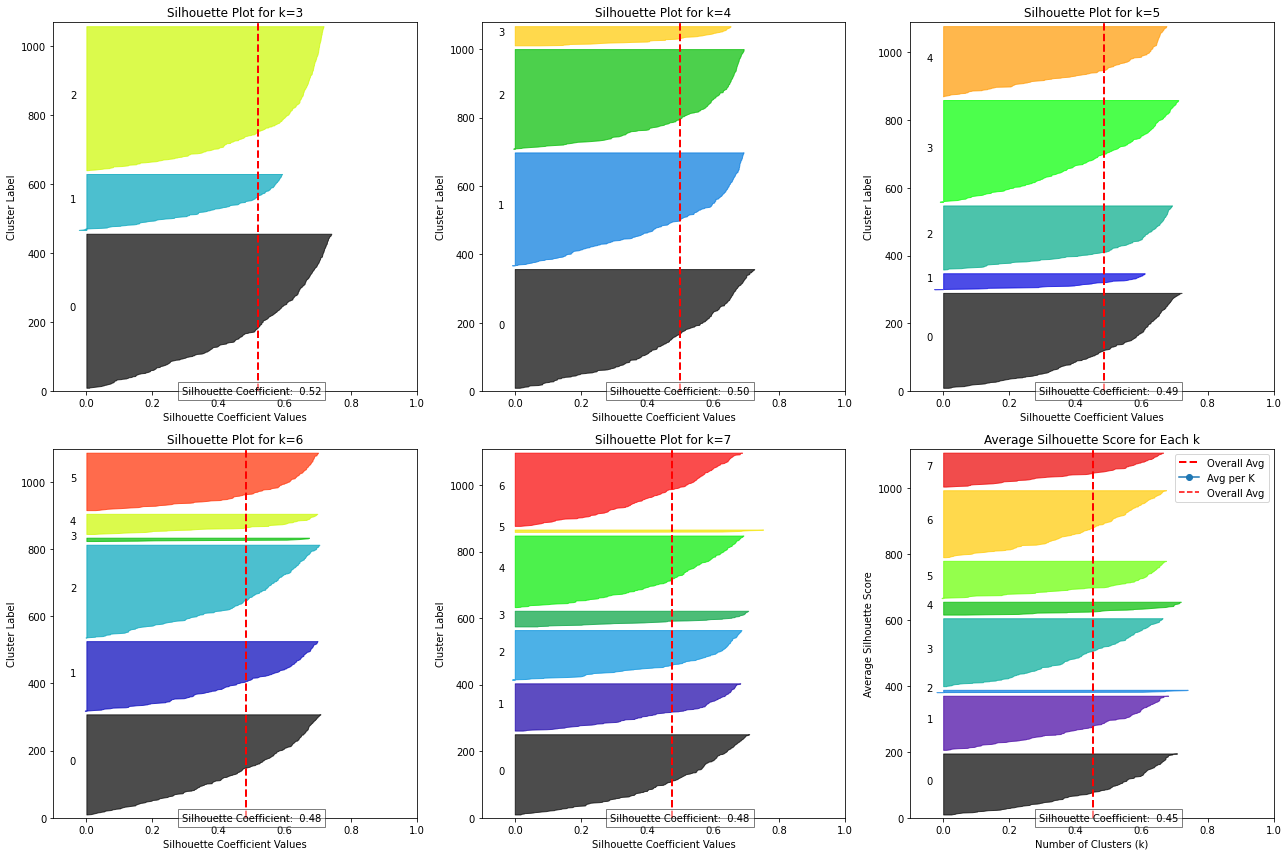

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
X = df[['Valence', 'Energy', 'Loudness']]

# Plotting existing supervised
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
k_values = [3, 4, 5, 6, 7, 8]  # Define the range of k values

# Added: Initialize lists to store average silhouette scores and overall averages
silhouette_avg_list = []
overall_avg_list = []

for i, k in enumerate(k_values):
    # Initialize KMeans model
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit the model
    cluster_labels = kmeans_model.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Added: Append the average silhouette score to the list
    silhouette_avg_list.append(silhouette_avg)
    
    # Calculate silhouette values for each sample
    silhouette_values = silhouette_samples(X, cluster_labels)
    
    # Plot silhouette plot
    ax = axs[i // 3, i % 3]
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    
    y_lower = 10
    
    for j in range(k):
        cluster_silhouette_values = silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()
        
        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        
        color = plt.cm.nipy_spectral(float(j) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        
        y_lower = y_upper + 10
    
    ax.set_title(f'Silhouette Plot for k={k}')
    ax.set_xlabel('Silhouette Coefficient Values')
    ax.set_ylabel('Cluster Label')
    
    # Added: Display silhouette coefficient scores on the plot.
    ax.text(0.5, -0.1, f'Silhouette Coefficient: {silhouette_avg : .2f}',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.5))
    
    # Added: Draw a vertical line for the overall average silhouette score
    overall_avg = np.mean(silhouette_values)
    overall_avg_list.append(overall_avg)
    ax.axvline(x=overall_avg, color='red', linestyle='--', linewidth=2, label='Overall Avg')

# Plot average silhouette scores
ax_avg = axs[1, 2]
ax_avg.plot(k_values, silhouette_avg_list, marker='o', label='Avg per K')
ax_avg.plot(k_values, overall_avg_list, linestyle='--', color='red', label='Overall Avg')
ax_avg.set_title('Average Silhouette Score for Each k')
ax_avg.set_xlabel('Number of Clusters (k)')
ax_avg.set_ylabel('Average Silhouette Score')
ax_avg.legend()

plt.tight_layout()
plt.show()

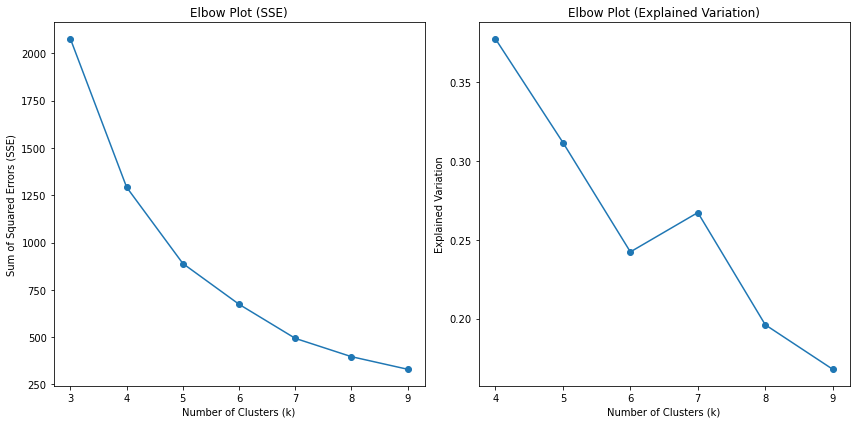

In [12]:
# can you insert elbow plots for k=3,4,5,6 for total Sum of squared errors and explained variation? 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of k values
k_values = range(3, 10)

# Lists to hold the SSE and explained variance
sse = []
explained_var = []

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init = 10)
    kmeans_model.fit(X)
    sse.append(kmeans_model.inertia_)
    if k != 3:
        explained_var.append((sse[-2] - sse[-1]) / sse[-2])

# Create the plot
plt.figure(figsize=(12, 6))

# Plot SSE
plt.subplot(121)
plt.plot(k_values, sse, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Plot (SSE)')

# Plot Explained Variance
plt.subplot(122)
plt.plot(k_values[1:], explained_var, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Explained Variation')
plt.title('Elbow Plot (Explained Variation)')

plt.tight_layout()
plt.show()

In [13]:
# can you show the k=6 clusters datapoint count and show the corresponding variables? I want to see everything about the clusterings so also plot the clusters 
from sklearn.cluster import KMeans
import numpy as np

# Fit KMeans model with k=6
kmeans_model = KMeans(n_clusters=5, random_state=42, n_init = 10)
kmeans_model.fit(X)

# Predict the cluster labels for data
labels = kmeans_model.predict(X)

# Get count of data points in each cluster
unique, counts = np.unique(labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} data points")
    

# convert pandas DataFrame to numpy array for indexing purpose
X_np = X.to_numpy()  
for cluster in unique:
    cluster_data = X_np[labels == cluster]


Cluster 0: 281 data points
Cluster 1: 48 data points
Cluster 2: 190 data points
Cluster 3: 301 data points
Cluster 4: 208 data points


In [23]:
# can you show the descriptive statistics of the clusters 
# Add cluster labels to dataset
X.loc[:,'Clusters'] = labels
# Group data by cluster labels and compute descriptive statistics 
cluster_stats = X.groupby('Clusters').describe()
cluster_stats

Valence 
 Energy 
 Loudness 
 
 
 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 count 
 mean 
 ... 
 75% 
 max 
 count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 Clusters 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 281.0 
 0.425279 
 0.244953 
 0.0252 
 0.22300 
 0.4130 
 0.60600 
 0.964 
 281.0 
 0.653644 
 ... 
 0.78500 
 0.967 
 281.0 
 -9.135940 
 0.658136 
 -10.324 
 -9.65400 
 -9.1920 
 -8.59500 
 -7.949 
 
 
 1 
 48.0 
 0.313429 
 0.227722 
 0.0376 
 0.14225 
 0.2370 
 0.46125 
 0.892 
 48.0 
 0.330596 
 ... 
 0.45225 
 0.725 
 48.0 
 -16.135625 
 2.273787 
 -22.646 
 -16.93500 
 -15.4460 
 -14.62600 
 -13.858 
 
 
 2 
 190.0 
 0.568132 
 0.234449 
 0.0350 
 0.37625 
 0.5640 
 0.76650 
 0.976 
 190.0 
 0.802300 
 ... 
 0.89100 
 0.994 
 190.0 
 -4.373921 
 0.842738 
 -5.545 
 -5.04125 
 -4.5165 
 -3.86625 
 -1.609 
 
 
 3 
 301.0 
 0.490322 
 0.247881 
 0.0306 
 0.29300 
 0.5020 
 0.67900 
 0.966 
 301.0 
 0.750352 
 ... 
 0.86600 
 0.986 
 301.0 
 -6.731621 
 0.690220 
 -7.950 
 -7.34100 
 -6.7400 
 -6.07900 
 -5.554 
 
 
 4 
 208.0 
 0.344678 
 0.242930 
 0.0270 
 0.14000 
 0.3205 
 0.49375 
 0.970 
 208.0 
 0.573495 
 ... 
 0.68900 
 0.941 
 208.0 
 -11.556962 
 0.893015 
 -13.737 
 -12.16475 
 -11.4155 
 -10.82025 
 -10.350 
 
 
 
 5 rows × 24 columns

In [15]:
df['Cluster'] = X['Clusters']

In [16]:
# can you distribute the values in 'User Mood' column into[0,5] range? 
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler(feature_range=(1, 10))

# fit and transform the data
df['User Mood'] = scaler.fit_transform(df[['User Mood']])

In [17]:
df['User Mood'] = df['User Mood'].apply(lambda x: round(x * 2) / 2)

In [18]:
Q1 = df['User Mood'].quantile(0.25)
Q3 = df['User Mood'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_upper = Q3 + (1.5 * IQR)
outlier_threshold_lower = Q1 - (1.5 * IQR)

df = df[(df['User Mood'] <= outlier_threshold_upper) & (df['User Mood'] >= outlier_threshold_lower)]

In [19]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler(feature_range=(1, 10))

# fit and transform the data
df['User Mood'] = scaler.fit_transform(df[['User Mood']])

In [20]:
df['User Mood'] = df['User Mood'].apply(float)
df['User Mood'] = np.round(df['User Mood'] * 2) / 2

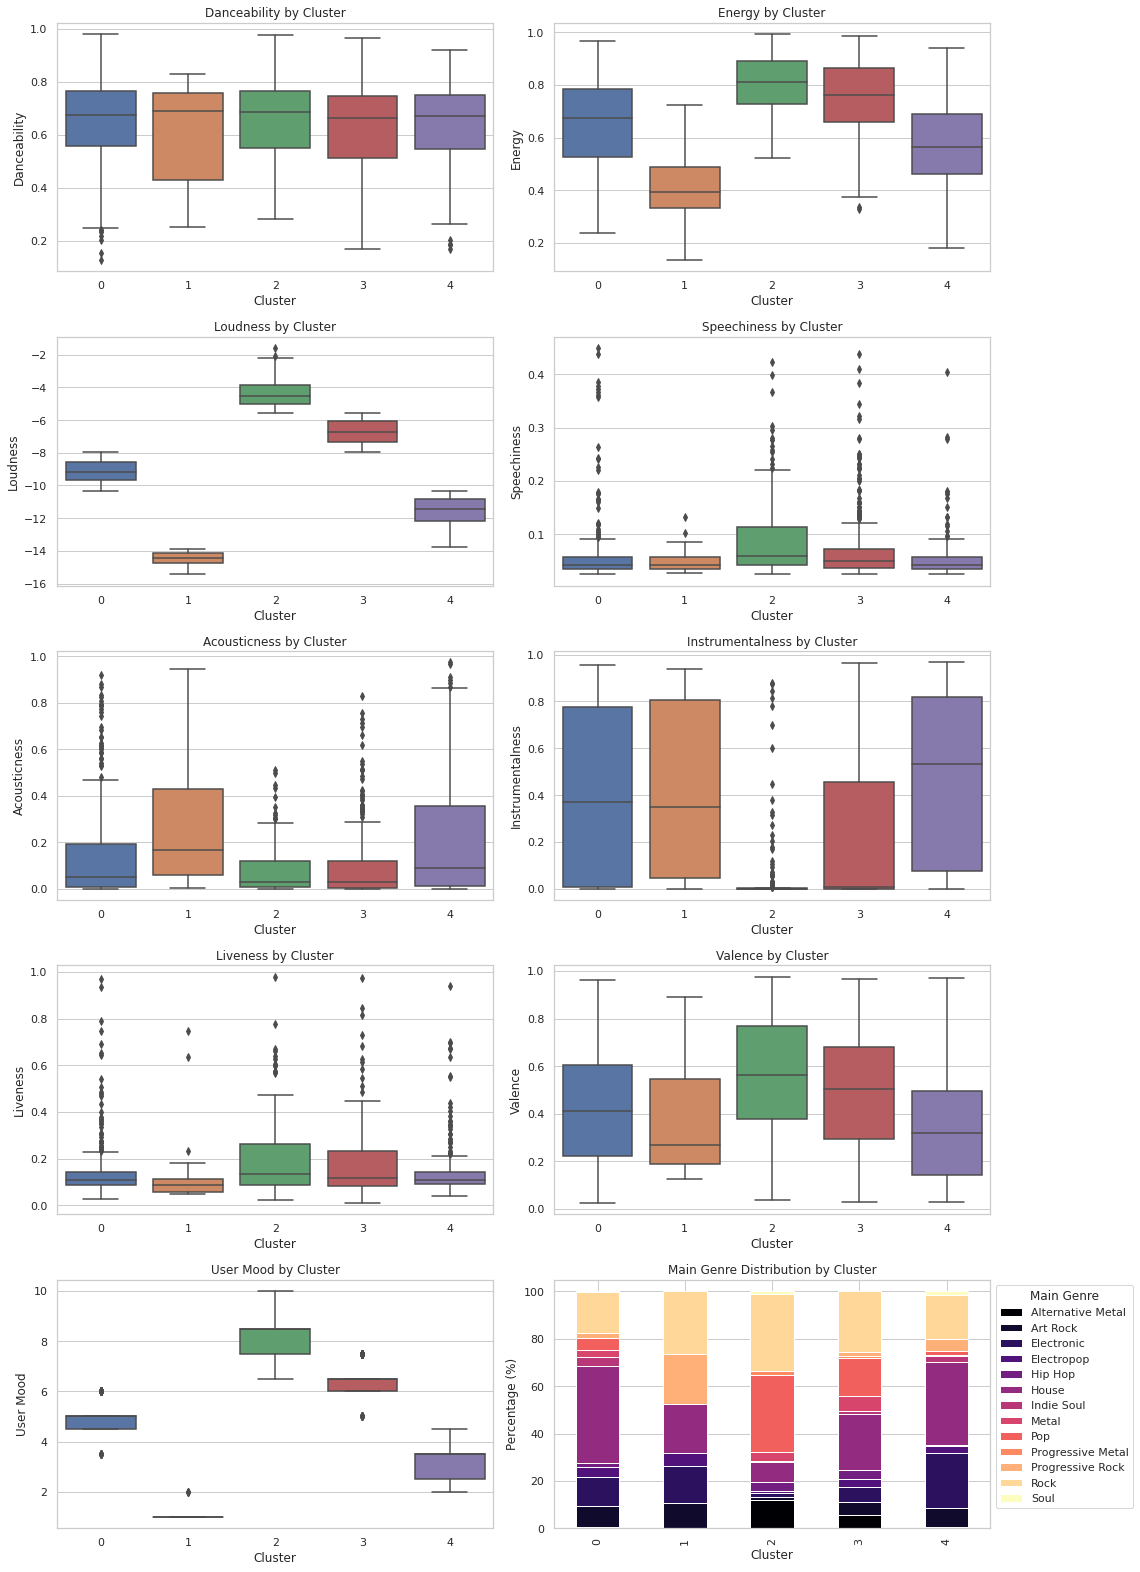

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create subplots for better organization
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 22))

# Features to visualize
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'User Mood']

# Add 'Main Genre' to the features
features.extend(['Main Genre'])

# Loop through features and create visualizations by cluster
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    
    # Use a stacked bar plot for 'Main Genre' by cluster
    if feature == 'Main Genre':
        # Create a DataFrame with the count of each genre by cluster
        genre_cluster_count = df.groupby(['Cluster', feature]).size().unstack(fill_value=0)
        
        # Normalize each row to represent the percentage of each genre in the cluster
        genre_cluster_percentage = genre_cluster_count.div(genre_cluster_count.sum(axis=1), axis=0) * 100
        
        # Plot the stacked bar plot
        genre_cluster_percentage.plot(kind='bar', stacked=True, ax=axes[row, col], colormap='magma')
        axes[row, col].set_title(f'{feature} Distribution by Cluster')
        axes[row, col].set_xlabel('Cluster')
        axes[row, col].set_ylabel('Percentage (%)')
        axes[row, col].legend(title=feature, bbox_to_anchor=(1, 1))
    else:
        # Box plot for other features by cluster
        sns.boxplot(x='Cluster', y=feature, data=df, ax=axes[row, col])
        axes[row, col].set_title(f'{feature} by Cluster')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [22]:
import pandas as pd

# Function to get valid user input in increments of 0.5
def get_user_input():
    while True:
        try:
            user_mood_input = float(input("Enter your mood from a scale of 1 to 10: "))

            if 1 <= user_mood_input <= 10:
                if user_mood_input % 0.5 == 0 or user_mood_input.is_integer():
                    return user_mood_input
                else:
                    raise ValueError("Invalid input. Please enter your number in increments of 0.5.")
            else:
                raise ValueError("Invalid input. Please enter a number between 1 and 10.")

        except ValueError as e:
            print(e)

# Function to get user-selected genres using option buttons
def get_selected_genres(all_genres):
    while True:
        print("\nSelect genres by typing the corresponding numbers separated by commas (e.g., 1, 3, 5) or type 'all' for All Genres:")
        for i, genre in enumerate(all_genres, start=1):
            print(f"{i}. {genre}")

        user_input = input("Enter genre numbers: ")

        if user_input.lower() == 'all':
            return all_genres

        try:
            selected_numbers = [int(num.strip()) for num in user_input.split(',')]
            selected_genres = [all_genres[num - 1] for num in selected_numbers if 0 < num <= len(all_genres)]
            if selected_genres:
                return selected_genres
            else:
                print("Invalid input. Please enter valid genre numbers.")
        except ValueError:
            print("Invalid input. Please enter valid genre numbers.")

# Get valid user input for mood
user_mood_input = get_user_input()

# Find user moods within a 0.5 range
selected_clusters = df[(df['User Mood'] >= user_mood_input - 0.5) & (df['User Mood'] <= user_mood_input + 0.5)]['Cluster']

# Get unique genres from the 'Main Genre' column
all_genres = df['Main Genre'].unique()

# Get user-selected genres
selected_genres = get_selected_genres(all_genres)

# Generate Playlist
if 'All Genres' in selected_genres:
    playlist = df[df['Cluster'].isin(selected_clusters)][['Track Name', 'Artist(s)', 'Main Genre', 'Album']]
else:
    while True:
        filtered_df = df[(df['Cluster'].isin(selected_clusters)) & (df['Main Genre'].isin(selected_genres))][['Track Name', 'Artist(s)', 'Main Genre', 'Album']]
        if not filtered_df.empty:
            playlist = filtered_df
            break
        else:
            print("No playlist found for the selected genres. Please try again with different genres.")
            selected_genres = get_selected_genres(all_genres)

# Display Playlist
print("\nGenerated Playlist:")
playlist

Enter your mood from a scale of 1 to 10:  4

Select genres by typing the corresponding numbers separated by commas (e.g., 1, 3, 5) or type 'all' for All Genres:
1. Electropop
2. Indie Soul
3. House
4. Electronic
5. Pop
6. Metal
7. Alternative Metal
8. Hip Hop
9. Progressive Metal
10. Rock
11. Progressive Rock
12. Art Rock
13. Soul
Enter genre numbers:  2,10,12

Generated Playlist:


,Track Name,Artist(s),Main Genre,Album
14,Too Much,Tora,Indie Soul,Take a Rest
15,These Simple Fears,"TEE MANGO, FEMME",Indie Soul,IMPERFECTIONS VOL.1
29,Bonfires,Elder Island,Indie Soul,Bonfires
44,Overthinking (feat. narou),"Bearcubs, narou",Indie Soul,Overthinking (feat. narou)
45,Beginner's Luck,Maribou State,Indie Soul,Kingdoms In Colour
...,...,...,...,...
954,Milkshake 20 - Alex Wann Remix,"Kelis, Alex Wann",Rock,Milkshake 20 (Alex Wann Remix)
990,Kiss,Prince,Rock,Parade - Music from the Motion Picture Under t...
992,Every Little Thing She Does Is Magic,The Police,Rock,Ghost In The Machine (Remastered 2003)
1006,Them Changes,Thundercat,Indie Soul,Drunk
